# Sentiment Analysis through BOW



### Import needed packages

In [1]:
import pandas as pd
import numpy as np
# import nltk
# from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import precision_recall_fscore_support as score
import matplotlib.pyplot as plt


Due to file size, before importing data you will need to navigate to the split_az folder in command line. Once there, run the following comand:

**cat ??? > combined_az.csv**

This will combine the three split files.

In [2]:
x_df = pd.read_csv('./split_az/combined_az.csv')

In [39]:
#calculate length of reviews
rev_len = []
n=0
for i in range(len(x_df)):
    rev_len.append(len(x_df.iloc[i][1].split()))
    n += 1
    
print(sum(rev_len)/n)

98.84980692599035


(array([5.1171e+04, 9.8160e+04, 7.2811e+04, 5.1080e+04, 3.3865e+04,
        2.4563e+04, 1.8098e+04, 1.2711e+04, 9.5130e+03, 7.3110e+03,
        5.6800e+03, 4.2570e+03, 3.1470e+03, 2.5940e+03, 1.9970e+03,
        1.6050e+03, 1.2470e+03, 9.3700e+02, 7.2600e+02, 6.6200e+02,
        5.6400e+02, 4.3800e+02, 3.4400e+02, 2.8800e+02, 2.2600e+02,
        2.1900e+02, 1.7100e+02, 1.2300e+02, 1.1400e+02, 9.0000e+01,
        1.0600e+02, 7.3000e+01, 6.8000e+01, 7.3000e+01, 6.7000e+01,
        7.7000e+01, 6.0000e+01, 3.5000e+01, 1.0000e+01, 4.0000e+00]),
 array([1.000e+00, 2.630e+01, 5.160e+01, 7.690e+01, 1.022e+02, 1.275e+02,
        1.528e+02, 1.781e+02, 2.034e+02, 2.287e+02, 2.540e+02, 2.793e+02,
        3.046e+02, 3.299e+02, 3.552e+02, 3.805e+02, 4.058e+02, 4.311e+02,
        4.564e+02, 4.817e+02, 5.070e+02, 5.323e+02, 5.576e+02, 5.829e+02,
        6.082e+02, 6.335e+02, 6.588e+02, 6.841e+02, 7.094e+02, 7.347e+02,
        7.600e+02, 7.853e+02, 8.106e+02, 8.359e+02, 8.612e+02, 8.865e+02,
        9.

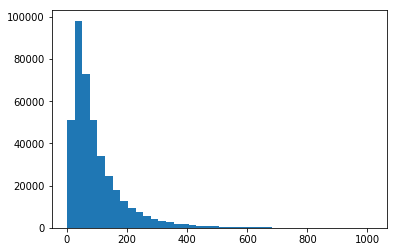

In [49]:

plt.hist(rev_len, bins=40)

### Build Models

In [3]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(x_df.text, x_df.binary_stars, test_size=0.20, random_state=42)

In [5]:
#Pipeline to build NB models

text_clf = Pipeline([('vect', CountVectorizer(stop_words='english', min_df=5, ngram_range=(1, 2))),
                     ('tfidf', TfidfTransformer()),  
                     ('clf', MultinomialNB(alpha=0.1)),
                    ])
text_clf = text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
np.mean(predicted == y_test)

# 92.68% CountVectorizer(stop_words='english', min_df=5, ngram_range=(1, 2))
# 94.67% w/ fit prior False
# 94.60% w/ alpha = 0.1

0.9460626472729067

In [6]:
#Pipeline to build SVM models

text_clf_svm = Pipeline([('vect', CountVectorizer(stop_words='english', min_df=5, ngram_range=(1, 2))),
                         ('tfidf', TfidfTransformer()), 
                         ('clf-svm', SGDClassifier(loss='modified_huber', class_weight = 'balanced', penalty='l2', alpha=1e-4, max_iter=5, random_state=42)),
                        ])

text_clf_svm = text_clf_svm.fit(X_train, y_train)
predicted_svm = text_clf_svm.predict(X_test)
np.mean(predicted_svm == y_test)

# 87.87% CountVectorizer(stop_words='english', min_df=5)
# 92.3% SGDCClassifier class_weight = 'balanced' loss='hinge'
# 93.3% SGDCClassifier class_weight = 'balanced' loss='modified_huber', alpha=1e-3
# 95.16% SGDCClassifier class_weight = 'balanced' loss='modified_huber', alpha=1e-4

0.9516266331100337

In [7]:
#Build NBSVM predictions

nb_pred_prob = text_clf.predict_proba(X_test)
svm_pred_prob = text_clf_svm.predict_proba(X_test)

best_pred = []
for i in range(len(predicted)):
    if max(svm_pred_prob[i]) > max(nb_pred_prob[i]):
        best_pred.append(predicted_svm[i])
    else:
        best_pred.append(predicted[i])



In [ ]:
#Print out examples of when the prediction is changed
for i in range(len(predicted)):
    if max(svm_pred_prob[i]) > max(nb_pred_prob[i]) and predicted_svm[i] != predicted[i]:
        print(predicted_svm[i], predicted[i], y_test.iloc[i], X_test.iloc[i], '\n\n\n')

In [13]:
precision, recall, fscore, support = score(y_test, predicted, average='weighted')

print('NB results:')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore), '\n')

precision, recall, fscore, support = score(y_test, predicted_svm, average='weighted')

print('SVM results:')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore), '\n')

precision, recall, fscore, support = score(y_test, best_pred, average='weighted')

print('NBSVM results:')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))


NB results:
precision: 0.9454554131989491
recall: 0.9460626472729067
fscore: 0.9454875439542538 

SVM results:
precision: 0.9543419124967573
recall: 0.9516266331100337
fscore: 0.9523506596317657 

NBSVM results:
precision: 0.9547937898922034
recall: 0.9549329484190138
fscore: 0.9548559200820541


In [14]:
review_len = 0
count_r = 0
for i in range(len(predicted)):
    if predicted[i] != y_test.iloc[i]:
        review_len += len(X_test.iloc[i].split())
        count_r += 1
        
print('Average length of incorrect NB prediction:', review_len/count_r)
        

Average length of incorrect NB prediction: 117.06084172003659


In [15]:
review_len = 0
count_r = 0
for i in range(len(predicted)):
    if predicted_svm[i] != y_test.iloc[i]:
        review_len += len(X_test.iloc[i].split())
        count_r += 1
        
print('Average length of incorrect SVM prediction:', review_len/count_r)


Average length of incorrect SVM prediction: 117.2257077276205
